In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nib

In [ ]:
lung_path = 'E:/data/Resize_nature_wulab'
#lung_path = '/Data/Resize_nature_wulab'

save_path  =  'E:/data/Histology/'
#save_path  =  'Data/Histology/nature'
os.makedirs(save_path, exist_ok=True)

In [ ]:
ct_list = [i for i in os.listdir(lung_path) if i.endswith('ct.nii.gz')]
bias = 4000
for i,ct in enumerate(ct_list):
    print('{} .  {}'.format(i+1, ct))
    whole_path_ct = os.path.join(lung_path, ct)
    whole_path_seg = os.path.join(lung_path, ct[:-9]+'lung.nii.gz')
    
    print(whole_path_ct)
    print(whole_path_seg)
    # load lung and normalize 
    lung_h = nib.load(whole_path_ct)
    lung = lung_h.get_fdata()
    lung = lung + bias
    #lung = normalize(lung)
    print('ct loaded')
    
    #load seg
    seg_h = nib.load(whole_path_seg)
    seg = seg_h.get_fdata()
    print('seg loaded')
    
    # lung* seg
    lung_seg = lung*seg
    lung_seg = lung_seg - bias

    img_NIFTI = nib.Nifti1Image(lung_seg, lung_h.affine )
    img_NIFTI.to_filename(os.path.join(save_path,ct))
    break
    

In [ ]:
ct_list = [i for i in os.listdir(lung_path) if i.endswith('ct.nii.gz')]
print(len(ct_list))
ct_list[0][:-9]

In [ ]:
lung.dtype

In [ ]:
nb_classes = 9
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
print(confusion_matrix)
To get the per-class accuracy:
print(confusion_matrix.diag()/confusion_matrix.sum(1))


###############################################################
###############################################################


from sklearn.metrics import confusion_matrix
nb_classes = 9
# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
print(conf_mat)
# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix([1, 0, 1, 0], [1, 0, 1, 1])

In [ ]:
conf_mat

In [61]:
import pandas as pd
import os
from os.path import exists

path = 'E:/data/Histology/nature_4d' #'/Data/Histology/nature_4d'
df = pd.read_csv( 'Patient_list_modified.csv') #pd.read_csv( '/Data/Histology/Patient_list_modified.csv')


In [76]:
p_list = df['ID'].tolist()
not_there = []
count = 0
for p in p_list:
    #print(count, end=' ')
    count += 1
    p_path = os.path.join(path, p + '_ct.nii.gz')
    if not exists(p_path):
        not_there.append(p_path)
        print(p_path)

E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_01_ct.nii.gz
E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_02_ct.nii.gz
E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_04_ct.nii.gz
E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_05_ct.nii.gz
E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_06_ct.nii.gz
E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_07_ct.nii.gz
E:/data/Histology/nature_4d\NSCLC_Hugo_89_pt_08_ct.nii.gz
E:/data/Histology/nature_4d\Stanford_stageIII_Smith,Basil_ct.nii.gz


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [75]:
not_there

['E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_01_ct.nii.gz',
 'E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_02_ct.nii.gz',
 'E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_04_ct.nii.gz',
 'E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_05_ct.nii.gz',
 'E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_06_ct.nii.gz',
 'E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_07_ct.nii.gz',
 'E:/data/Histology/nature_4d\\NSCLC_Hugo_89_pt_08_ct.nii.gz',
 'E:/data/Histology/nature_4d\\Stanford_stageIII_Smith,Basil_ct.nii.gz']

In [7]:
a_h = nib.load('E:/data/Resize_nature_wulab/NSCLC_Hugo_89_pt_28_ct.nii.gz')
a = a_h.get_fdata()

b_h = nib.load('E:/data/Resize_nature_wulab/Sandy1_R01-043_ct.nii.gz')
b = b_h.get_fdata()

In [11]:
b = b_h.get_fdata()

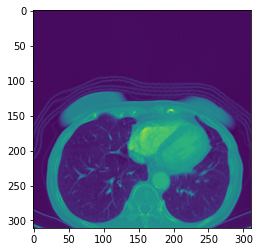

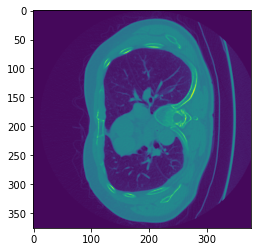

In [12]:
plt.imshow(a[:,:,150])
plt.show()
plt.imshow(b[:,:,150])
plt.show()